In [75]:
import numpy as np
import pandas as pd
%matplotlib inline
import random
from pprint import pprint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import timeit
import matplotlib.pyplot as plt
from dtreefunctions import decision_tree_algorithm,decision_tree_predictions,train_test_split
from randomforestfunctions import random_forest_algorithm,random_forest_predictions

In [76]:
df = pd.read_csv("breast-cancer.csv",skipinitialspace=True)
df["label"] = df.Class
df = df.drop("Class", axis=1)

column_names = []
for column in df.columns:
    name = column.replace("-", "_")
    column_names.append(name)
df.columns = column_names


In [77]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.2)


In [78]:
forest = random_forest_algorithm(train_df, n_trees=60, n_bootstrap=20, n_features=5, dt_max_depth=4)


In [79]:
predictions = random_forest_predictions(test_df, forest)
accuracy_score(predictions, test_df.label)

0.6842105263157895

In [80]:
test_df.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,label
197,40-49,premeno,Oct-14,0-2,no,2,left,left_low,yes,no-recurrence-events
215,40-49,ge40,20-24,0-2,no,2,right,left_up,no,recurrence-events
20,50-59,ge40,40-44,0-2,no,2,left,left_low,no,no-recurrence-events
132,40-49,premeno,30-34,06-Aug,no,2,left,left_up,no,no-recurrence-events
261,40-49,ge40,25-29,Dec-14,yes,3,left,right_low,yes,recurrence-events


In [90]:
import timeit
tic=timeit.default_timer()
Accuracy = []
#x = [60,65,70,75,80,85,90,95,100,105,110,115]
i = 1
x = []
while i <= 50:
    forest = random_forest_algorithm(train_df, n_trees=i, n_bootstrap=20, n_features=3, dt_max_depth=999)
    try:
        print(i)
        predictions = random_forest_predictions(test_df, forest)
        Accuracy.append(accuracy_score(predictions, test_df.label))
        x.append(i)
    except AttributeError:
        print ("Error in tree", i)
    i = i+1    
        
toc=timeit.default_timer()
print(toc - tic)
print(x)


1
2
3
4
Error in tree 4
5
6
7
8
9
10
11
12
Error in tree 12
13
14
15
16
17
18
19
20
21
Error in tree 21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
Error in tree 43
44
45
46
47
48
49
50
15.490291491998505
[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50]


In [91]:
column_name=["Accuracy"]
df_result = pd.DataFrame({'Accuracies':Accuracy})

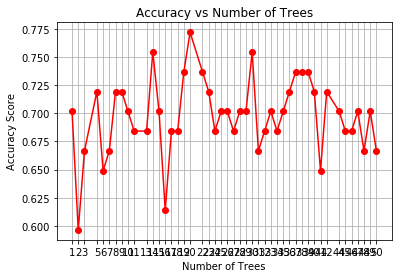

In [92]:
plt.plot(x,df_result["Accuracies"],'r',marker='o') # 'r' is the color red
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Number of Trees')
plt.grid(True)
plt.xticks(x)
plt.show()